# 02-Stock-Forecasting

![](https://images.unsplash.com/photo-1468254095679-bbcba94a7066?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1049&q=80)

Photo by [Rick Tap](https://unsplash.com/photos/uJhgEXPqSPk)

In this exercise, you will use a RNN to predict the stock market evolution.

Stock market can be seen as a sequence of values (each day is a step), and thus you can predict the closing value of the next day, knowing the past.

First, load the dataset `all_stocks_5yr.csv`, which contains all the stock market values over 5 years for many companies. Then explore it.

In [27]:
# TODO: Load the dataset and explore it
### STRIP_START ###
import pandas as pd
data=pd.read_csv('../DataSets/all_stocks_5yr.csv')
data.head()
### STRIP_END ###

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [38]:
# TODO: Load the dataset and explore it
### STRIP_START ###

# Dimension
print(data.shape)
print(data['Name'].value_counts())
print(data.isna().sum())
#print(data['close'].isna().sum())
#data['close'].unique()
### STRIP_END ###

(619040, 7)
AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64
date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [ ]:
#Remplacer les valeurs manquants par la moyenne
#Detecter les valeurs aberants
#Detecter les valeurs dupliques

The column name represent the name of the stock, for example `'AAL'` stands for American Airlines.

Select a name for which you have many information (i.e. the more lines), and plot the `close` value of this stock as a function of time. This represents the stock market evolution.

In [39]:
# TODO: Plot the stock market evolution of a given name
import numpy as np
data_AAL= data[data['Name'] == 'AAL']
date = pd.to_datetime(data_AAL['date'])
close= data_AAL['close']
date.head()
#close.head()
### STRIP_START ###
### STRIP_END ###

0   2013-02-08
1   2013-02-11
2   2013-02-12
3   2013-02-13
4   2013-02-14
Name: date, dtype: datetime64[ns]

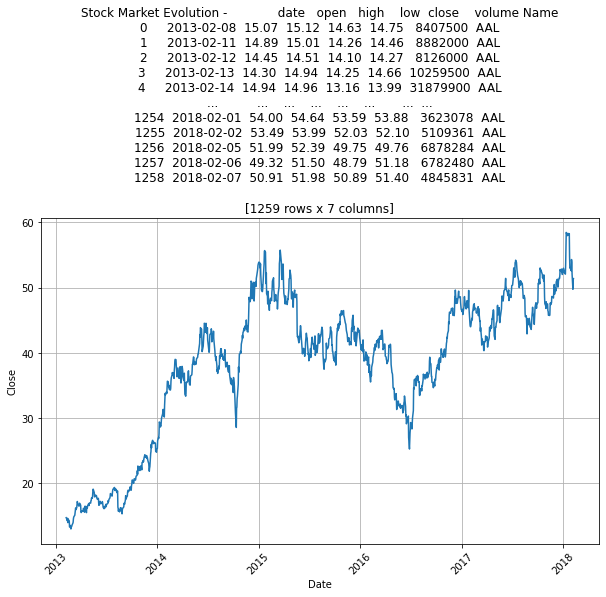

In [40]:
# TODO: Plot the stock market evolution of a given name
### STRIP_START ###
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(date, close)
plt.title(f'Stock Market Evolution - {data_AAL}')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
### STRIP_END ###

We will now try to make a prediction of this close value of a day, based on all the features (`open`, `high`, `low`, `close`, `volume`) of the 30 past days.

Before doing so, we need to create the (X, y) dataset!

Let's consider your action `Name` has 100 lines.

The `X` values should contain, in each line, a table of 30 days and 5 features (`open`, `high`, `low`, `close`, `volume`). So that the final `X` array will have the shape `(69, 30, 5)`.

This `y` values should be the `close` values of the days 31 to last (indeed, `y` can not contain the 30 first days, since we need 30 days of X to predict before). So the final `y` array will have the shape `(69, 1)` (or equivalently `(69,)`).

In [41]:
# TODO: compute X and y
### STRIP_START ###
data_AAL=data_AAL.sort_values('date')
data_AAL.head()
#close_value=data_AAL['close'].iloc[0:99]
close_value=data_AAL['close']
data_AAL.head()
X=[]
Y=[]
for i in range( 30, len(close_value)):
    X.append(data_AAL.iloc[i-30:i][['open', 'high', 'low', 'close', 'volume']])
    Y.append(close_value[i])
X = np.array(X)
y = np.array(Y)

# Print the shapes of X and y
print(X.shape)
print(y.shape)
### STRIP_END ###

(1229, 30, 5)
(1229,)


array([[1.50700e+01, 1.51200e+01, 1.46300e+01, 1.47500e+01, 8.40750e+06],
       [1.48900e+01, 1.50100e+01, 1.42600e+01, 1.44600e+01, 8.88200e+06],
       [1.44500e+01, 1.45100e+01, 1.41000e+01, 1.42700e+01, 8.12600e+06],
       [1.43000e+01, 1.49400e+01, 1.42500e+01, 1.46600e+01, 1.02595e+07],
       [1.49400e+01, 1.49600e+01, 1.31600e+01, 1.39900e+01, 3.18799e+07],
       [1.39300e+01, 1.46100e+01, 1.39300e+01, 1.45000e+01, 1.56280e+07],
       [1.43300e+01, 1.45600e+01, 1.40800e+01, 1.42600e+01, 1.13544e+07],
       [1.41700e+01, 1.42600e+01, 1.31500e+01, 1.33300e+01, 1.47252e+07],
       [1.36200e+01, 1.39500e+01, 1.29000e+01, 1.33700e+01, 1.19221e+07],
       [1.35700e+01, 1.36000e+01, 1.32100e+01, 1.35700e+01, 6.07140e+06],
       [1.36000e+01, 1.37600e+01, 1.30000e+01, 1.30200e+01, 7.18640e+06],
       [1.31400e+01, 1.34200e+01, 1.27000e+01, 1.32600e+01, 9.41900e+06],
       [1.32800e+01, 1.36200e+01, 1.31800e+01, 1.34100e+01, 7.39050e+06],
       [1.34900e+01, 1.36300e+01, 1.33

In [44]:
range(30, len(close_value))[0]

30

You already know the next step: prepare and split the data. Be careful, we want to keep the order in sequence...

In [93]:
# TODO: Prepare and split the data
### STRIP_START ###
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_scaled=(X-np.mean(X,axis=0))/np.std(X,axis=0)

#X=StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
### STRIP_END ###

X_train shape: (983, 30, 5)
y_train shape: (983,)
X_test shape: (246, 30, 5)
y_test shape: (246,)


Now that the data is ready, build a RNN model (for example begin with 2 layers of 16 units), compile it and train it.

In [94]:
# TODO: Train your RNN model
### STRIP_START ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , SimpleRNN 

# Set random seed for reproducibility


# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=32,return_sequences=True,input_shape=(30,5)))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=False))
model.add(Dense(units=1, activation='linear'))

#2 model
model2 = Sequential()
model2.add(SimpleRNN(units=32,return_sequences=True,input_shape=(30,5)))
model2.add(SimpleRNN(units=32, return_sequences=True))
model2.add(SimpleRNN(units=32, return_sequences=False))
model2.add(Dense(units=1, activation='sigmoid'))


### STRIP_END ###

In [95]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
model2.compile(optimizer='adam',loss='mean_squared_error')

In [96]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=500,batch_size=64)
model2.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=500,batch_size=64)

Epoch 1/500
16/16 [==============================] - 3s 48ms/step - loss: 1410.8169 - val_loss: 2074.6711
Epoch 2/500
16/16 [==============================] - 0s 22ms/step - loss: 1200.5510 - val_loss: 1955.4960
Epoch 3/500
16/16 [==============================] - 0s 22ms/step - loss: 983.8508 - val_loss: 1782.5066
Epoch 4/500
16/16 [==============================] - 0s 21ms/step - loss: 910.2029 - val_loss: 1837.6125
Epoch 5/500
16/16 [==============================] - 0s 23ms/step - loss: 864.0887 - val_loss: 1872.0251
Epoch 6/500
16/16 [==============================] - 0s 26ms/step - loss: 827.2305 - val_loss: 1897.0527
Epoch 7/500
16/16 [==============================] - 0s 22ms/step - loss: 794.3845 - val_loss: 1891.8566
Epoch 8/500
16/16 [==============================] - 0s 22ms/step - loss: 763.8154 - val_loss: 1911.8774
Epoch 9/500
16/16 [==============================] - 0s 24ms/step - loss: 735.0427 - val_loss: 1903.9960
Epoch 10/500
16/16 [==============================] -

16/16 [==============================] - 0s 20ms/step - loss: 158.5522 - val_loss: 321.5014
Epoch 79/500
16/16 [==============================] - 0s 21ms/step - loss: 145.5621 - val_loss: 323.9327
Epoch 80/500
16/16 [==============================] - 0s 21ms/step - loss: 144.0888 - val_loss: 313.0245
Epoch 81/500
16/16 [==============================] - 0s 20ms/step - loss: 142.6625 - val_loss: 314.2221
Epoch 82/500
16/16 [==============================] - 0s 21ms/step - loss: 139.1239 - val_loss: 328.8497
Epoch 83/500
16/16 [==============================] - 0s 21ms/step - loss: 136.1269 - val_loss: 317.5777
Epoch 84/500
16/16 [==============================] - 0s 21ms/step - loss: 135.8782 - val_loss: 320.5800
Epoch 85/500
16/16 [==============================] - 0s 21ms/step - loss: 135.7574 - val_loss: 325.1200
Epoch 86/500
16/16 [==============================] - 0s 20ms/step - loss: 132.8588 - val_loss: 326.2595
Epoch 87/500
16/16 [==============================] - 0s 20ms/step -

16/16 [==============================] - 0s 25ms/step - loss: 25.5595 - val_loss: 463.2372
Epoch 157/500
16/16 [==============================] - 0s 21ms/step - loss: 25.1195 - val_loss: 459.7195
Epoch 158/500
16/16 [==============================] - 0s 21ms/step - loss: 24.9780 - val_loss: 479.3646
Epoch 159/500
16/16 [==============================] - 0s 21ms/step - loss: 24.7159 - val_loss: 502.6214
Epoch 160/500
16/16 [==============================] - 0s 21ms/step - loss: 24.4943 - val_loss: 522.8040
Epoch 161/500
16/16 [==============================] - 0s 20ms/step - loss: 24.2211 - val_loss: 547.6597
Epoch 162/500
16/16 [==============================] - 0s 21ms/step - loss: 24.0250 - val_loss: 557.7222
Epoch 163/500
16/16 [==============================] - 0s 20ms/step - loss: 23.8393 - val_loss: 552.2784
Epoch 164/500
16/16 [==============================] - 0s 21ms/step - loss: 23.6844 - val_loss: 542.9623
Epoch 165/500
16/16 [==============================] - 0s 21ms/step -

Epoch 235/500
16/16 [==============================] - 0s 21ms/step - loss: 4.4667 - val_loss: 16.0910
Epoch 236/500
16/16 [==============================] - 0s 25ms/step - loss: 4.2672 - val_loss: 15.7529
Epoch 237/500
16/16 [==============================] - 0s 21ms/step - loss: 4.2208 - val_loss: 15.5593
Epoch 238/500
16/16 [==============================] - 0s 21ms/step - loss: 4.1312 - val_loss: 15.1437
Epoch 239/500
16/16 [==============================] - 0s 24ms/step - loss: 4.0102 - val_loss: 14.8355
Epoch 240/500
16/16 [==============================] - 0s 20ms/step - loss: 3.9611 - val_loss: 14.4973
Epoch 241/500
16/16 [==============================] - 0s 21ms/step - loss: 3.8361 - val_loss: 14.2313
Epoch 242/500
16/16 [==============================] - 0s 21ms/step - loss: 3.7811 - val_loss: 13.9309
Epoch 243/500
16/16 [==============================] - 0s 21ms/step - loss: 3.7158 - val_loss: 13.6835
Epoch 244/500
16/16 [==============================] - 0s 21ms/step - los

16/16 [==============================] - 0s 21ms/step - loss: 1.8327 - val_loss: 5.2332
Epoch 316/500
16/16 [==============================] - 0s 20ms/step - loss: 1.8166 - val_loss: 5.1311
Epoch 317/500
16/16 [==============================] - 0s 20ms/step - loss: 1.7296 - val_loss: 5.0890
Epoch 318/500
16/16 [==============================] - 0s 20ms/step - loss: 1.7265 - val_loss: 5.0160
Epoch 319/500
16/16 [==============================] - 0s 20ms/step - loss: 1.7012 - val_loss: 4.9887
Epoch 320/500
16/16 [==============================] - 0s 21ms/step - loss: 1.7100 - val_loss: 5.0372
Epoch 321/500
16/16 [==============================] - 0s 21ms/step - loss: 1.7393 - val_loss: 4.8833
Epoch 322/500
16/16 [==============================] - 0s 21ms/step - loss: 1.7180 - val_loss: 4.8767
Epoch 323/500
16/16 [==============================] - 0s 21ms/step - loss: 1.6744 - val_loss: 4.8220
Epoch 324/500
16/16 [==============================] - 0s 21ms/step - loss: 1.7206 - val_loss: 4

16/16 [==============================] - 0s 21ms/step - loss: 1.2147 - val_loss: 2.6849
Epoch 396/500
16/16 [==============================] - 0s 22ms/step - loss: 1.2155 - val_loss: 2.7902
Epoch 397/500
16/16 [==============================] - 0s 22ms/step - loss: 1.2063 - val_loss: 2.6532
Epoch 398/500
16/16 [==============================] - 0s 22ms/step - loss: 1.1956 - val_loss: 2.6273
Epoch 399/500
16/16 [==============================] - 0s 29ms/step - loss: 1.1762 - val_loss: 2.6253
Epoch 400/500
16/16 [==============================] - 0s 23ms/step - loss: 1.1871 - val_loss: 2.6431
Epoch 401/500
16/16 [==============================] - 0s 23ms/step - loss: 1.2026 - val_loss: 2.5800
Epoch 402/500
16/16 [==============================] - 0s 25ms/step - loss: 1.2116 - val_loss: 2.6006
Epoch 403/500
16/16 [==============================] - 0s 23ms/step - loss: 1.2037 - val_loss: 2.5768
Epoch 404/500
16/16 [==============================] - 0s 28ms/step - loss: 1.2490 - val_loss: 2

16/16 [==============================] - 0s 23ms/step - loss: 0.9948 - val_loss: 2.0686
Epoch 476/500
16/16 [==============================] - 0s 23ms/step - loss: 1.0698 - val_loss: 1.9313
Epoch 477/500
16/16 [==============================] - 0s 20ms/step - loss: 1.0442 - val_loss: 1.8981
Epoch 478/500
16/16 [==============================] - 0s 22ms/step - loss: 1.0070 - val_loss: 1.9431
Epoch 479/500
16/16 [==============================] - 0s 22ms/step - loss: 1.0215 - val_loss: 1.8966
Epoch 480/500
16/16 [==============================] - 0s 21ms/step - loss: 1.0715 - val_loss: 1.9213
Epoch 481/500
16/16 [==============================] - 0s 22ms/step - loss: 1.0933 - val_loss: 2.0015
Epoch 482/500
16/16 [==============================] - 0s 23ms/step - loss: 0.9926 - val_loss: 1.8890
Epoch 483/500
16/16 [==============================] - 0s 21ms/step - loss: 0.9853 - val_loss: 2.0688
Epoch 484/500
16/16 [==============================] - 0s 23ms/step - loss: 1.0151 - val_loss: 1

Epoch 53/500
16/16 [==============================] - 0s 22ms/step - loss: 1374.6365 - val_loss: 2253.9197
Epoch 54/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6360 - val_loss: 2253.9194
Epoch 55/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6357 - val_loss: 2253.9189
Epoch 56/500
16/16 [==============================] - 0s 22ms/step - loss: 1374.6355 - val_loss: 2253.9187
Epoch 57/500
16/16 [==============================] - 0s 22ms/step - loss: 1374.6354 - val_loss: 2253.9182
Epoch 58/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6351 - val_loss: 2253.9177
Epoch 59/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6346 - val_loss: 2253.9175
Epoch 60/500
16/16 [==============================] - 0s 24ms/step - loss: 1374.6348 - val_loss: 2253.9172
Epoch 61/500
16/16 [==============================] - 0s 27ms/step - loss: 1374.6345 - val_loss: 2253.9170
Epoch 62/500
16/16 [=================

16/16 [==============================] - 0s 20ms/step - loss: 1374.6284 - val_loss: 2253.9077
Epoch 130/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6284 - val_loss: 2253.9077
Epoch 131/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6284 - val_loss: 2253.9075
Epoch 132/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6283 - val_loss: 2253.9075
Epoch 133/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6283 - val_loss: 2253.9075
Epoch 134/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6283 - val_loss: 2253.9075
Epoch 135/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6283 - val_loss: 2253.9075
Epoch 136/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6284 - val_loss: 2253.9075
Epoch 137/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6283 - val_loss: 2253.9072
Epoch 138/500
16/16 [=====================

Epoch 205/500
16/16 [==============================] - 0s 30ms/step - loss: 1374.6272 - val_loss: 2253.9053
Epoch 206/500
16/16 [==============================] - 0s 29ms/step - loss: 1374.6268 - val_loss: 2253.9053
Epoch 207/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6270 - val_loss: 2253.9053
Epoch 208/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6270 - val_loss: 2253.9053
Epoch 209/500
16/16 [==============================] - 0s 22ms/step - loss: 1374.6271 - val_loss: 2253.9053
Epoch 210/500
16/16 [==============================] - 0s 22ms/step - loss: 1374.6271 - val_loss: 2253.9053
Epoch 211/500
16/16 [==============================] - 0s 27ms/step - loss: 1374.6271 - val_loss: 2253.9053
Epoch 212/500
16/16 [==============================] - 0s 23ms/step - loss: 1374.6271 - val_loss: 2253.9053
Epoch 213/500
16/16 [==============================] - 1s 35ms/step - loss: 1374.6268 - val_loss: 2253.9053
Epoch 214/500
16/16 [=======

Epoch 281/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6266 - val_loss: 2253.9045
Epoch 282/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6266 - val_loss: 2253.9045
Epoch 283/500
16/16 [==============================] - 0s 22ms/step - loss: 1374.6263 - val_loss: 2253.9045
Epoch 284/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6266 - val_loss: 2253.9045
Epoch 285/500
16/16 [==============================] - 0s 28ms/step - loss: 1374.6263 - val_loss: 2253.9045
Epoch 286/500
16/16 [==============================] - 1s 36ms/step - loss: 1374.6263 - val_loss: 2253.9045
Epoch 287/500
16/16 [==============================] - 1s 34ms/step - loss: 1374.6263 - val_loss: 2253.9045
Epoch 288/500
16/16 [==============================] - 1s 33ms/step - loss: 1374.6262 - val_loss: 2253.9045
Epoch 289/500
16/16 [==============================] - 1s 34ms/step - loss: 1374.6263 - val_loss: 2253.9045
Epoch 290/500
16/16 [=======

Epoch 357/500
16/16 [==============================] - 1s 33ms/step - loss: 1374.6261 - val_loss: 2253.9043
Epoch 358/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6261 - val_loss: 2253.9043
Epoch 359/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6261 - val_loss: 2253.9043
Epoch 360/500
16/16 [==============================] - 1s 40ms/step - loss: 1374.6259 - val_loss: 2253.9043
Epoch 361/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6260 - val_loss: 2253.9043
Epoch 362/500
16/16 [==============================] - 0s 25ms/step - loss: 1374.6261 - val_loss: 2253.9043
Epoch 363/500
16/16 [==============================] - 0s 24ms/step - loss: 1374.6261 - val_loss: 2253.9043
Epoch 364/500
16/16 [==============================] - 0s 24ms/step - loss: 1374.6262 - val_loss: 2253.9043
Epoch 365/500
16/16 [==============================] - 0s 24ms/step - loss: 1374.6261 - val_loss: 2253.9043
Epoch 366/500
16/16 [=======

Epoch 433/500
16/16 [==============================] - 0s 23ms/step - loss: 1374.6260 - val_loss: 2253.9041
Epoch 434/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6259 - val_loss: 2253.9041
Epoch 435/500
16/16 [==============================] - 0s 18ms/step - loss: 1374.6260 - val_loss: 2253.9041
Epoch 436/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6259 - val_loss: 2253.9041
Epoch 437/500
16/16 [==============================] - 0s 21ms/step - loss: 1374.6257 - val_loss: 2253.9041
Epoch 438/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6259 - val_loss: 2253.9041
Epoch 439/500
16/16 [==============================] - 0s 19ms/step - loss: 1374.6257 - val_loss: 2253.9041
Epoch 440/500
16/16 [==============================] - 0s 19ms/step - loss: 1374.6259 - val_loss: 2253.9041
Epoch 441/500
16/16 [==============================] - 0s 20ms/step - loss: 1374.6257 - val_loss: 2253.9041
Epoch 442/500
16/16 [=======

In [97]:
loss = model.evaluate(X_test, y_test)
loss2 = model2.evaluate(X_test, y_test)

print("Test Loss 1:", loss)
print("Test Loss 2:", loss2)

8/8 [==============================] - 0s 8ms/step - loss: 2253.9038
Test Loss 1: 1.8057031631469727
Test Loss 2: 2253.90380859375


In [98]:
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
print([[y_pred2,y_pred]])

8/8 [==============================] - 0s 8ms/step
[[array([[0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
       [0.9999989 ],
  

Finally, plot the results: display on the same plot `y_train`, `y_test` and the prediction of `y_test`.

8/8 [==============================] - 0s 8ms/step


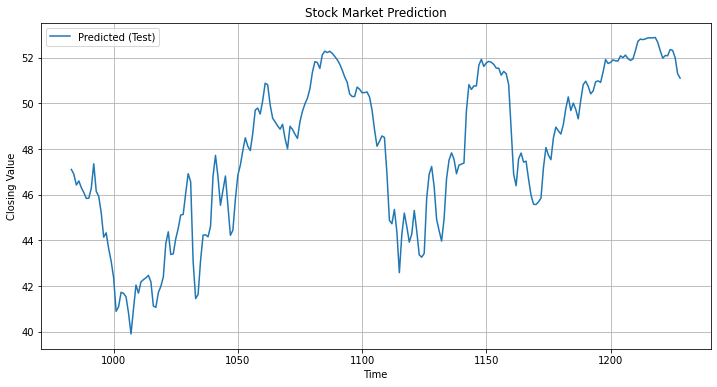

In [99]:
# TODO: Plot the results
### STRIP_START ###
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


plt.figure(figsize=(12, 6))

#plt.plot(range(len(y_train)), y_train, label='Actual (Train)')

#plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Test)')

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, label='Predicted (Test)')

plt.title('Stock Market Prediction')
plt.xlabel('Time')
plt.ylabel('Closing Value')
plt.legend()
plt.grid(True)
plt.show()


### STRIP_END ###

In [100]:
y_pred=model.predict(X_test)
y_pred2=model2.predict(X_test)



8/8 [==============================] - 0s 7ms/step


In [103]:
import pickle
file_model="model_rnn_bourse.sav"
pickle.dump(model,open(file_model,'wb'))

In [109]:
x=[12.0,15.0,10.0,13.0,14100]
x=np.ndarray(x)
print(x)
#model.predict(x)
print(type(X_test[0]))

TypeError: 'float' object cannot be interpreted as an integer

You can try to improve your model by adding as features the information of other actions. As you know, in stock market, most of the information that impacts it is out of the stock market information itself.